### Method 1

In [1]:
# step 1: import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# step 2: create a data
data = pd.DataFrame({'age':[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

In [2]:
data

,age
0,20
1,21
2,22
3,23
4,24
5,25
6,26
7,27
8,28
9,29


<Axes: xlabel='age', ylabel='Count'>

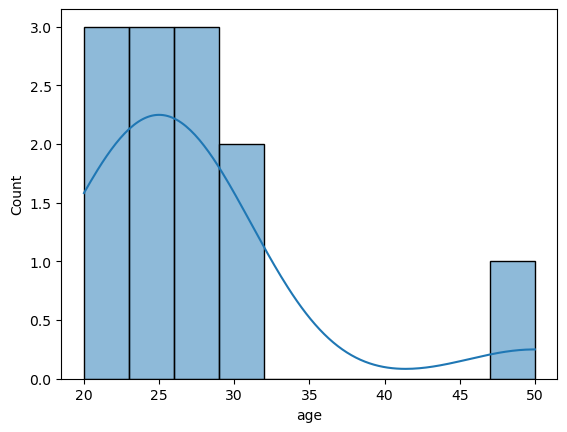

In [3]:
sns.histplot(data['age'], bins=10, kde=True)

<Axes: ylabel='age'>

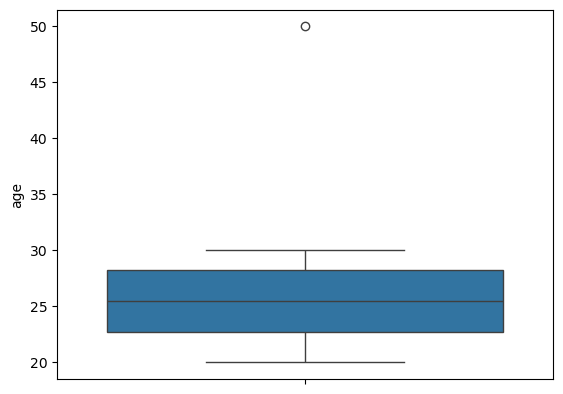

In [4]:
sns.boxplot(data=data, y='age')

In [5]:
# step 3: calculate the mean and standard deviation
mean_age = np.mean(data['age'])
std_age = np.std(data['age'])
print(f'Mean Age: {mean_age}, Standard Deviation: {std_age}')

# step 4: calculate the z-scores
data['z_score'] = (data['age'] - mean_age) / std_age
data

Mean Age: 27.083333333333332, Standard Deviation: 7.543853274171114


,age,z_score
0,20,-0.938954
1,21,-0.806396
2,22,-0.673838
3,23,-0.541280
4,24,-0.408721
5,25,-0.276163
6,26,-0.143605
7,27,-0.011047
8,28,0.121512
9,29,0.254070


In [6]:
# step 5: print the data
print("------------------------------------")
print(f"Here i the data with z-scores:\n{data}")
print("------------------------------------")

------------------------------------
Here i the data with z-scores:
    age   z_score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628
11   50  3.037793
------------------------------------


In [7]:
# step 6: print the outliers
print(f"Here are the outliers based on the z-score threshold of 3:\n{data[data['z_score'].abs() > 3]}")
print("------------------------------------")

Here are the outliers based on the z-score threshold of 3:
    age   z_score
11   50  3.037793
------------------------------------


In [8]:
# step 7: remove the outliers 
data = data[data['z_score'] <= 3]

# step 8: print the data without outliers
print(f"Here is the data without outliers:\n{data}")
print("------------------------------------")

Here is the data without outliers:
    age   z_score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628
------------------------------------


### Method 2

In [9]:
# import libraries 
import numpy as np
from scipy import stats

# sample data
data = [2.5, 2.7, 2.8, 3.0, 3.1, 3.2, 3.5, 3.6, 3.7, 4.0, 110]

# calculate z-scores for each data point
z_scores = np.abs(stats.zscore(data))

# set a threshold for identifying outliers
threshold = 2.5

outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print(f"Here is the data with z-scores:\n{data}")
print("----------------------------------------")

print("Indicate the outliers:", outliers)
print("Outliers in the data:", [data[i] for i in outliers])

# reomve the outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Here is the data with z-scores:
[2.5, 2.7, 2.8, 3.0, 3.1, 3.2, 3.5, 3.6, 3.7, 4.0, 110]
----------------------------------------
Indicate the outliers: [10]
Outliers in the data: [110]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.1, 3.2, 3.5, 3.6, 3.7, 4.0]


### Method 3

In [10]:
# step 1: import the required libraries
import pandas as pd
import numpy as np

# step 2: create a data
data = pd.DataFrame({'age':[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

# step 3: calculate first and third quartiles
Q1  = np.percentile(data['age'], 25, interpolation='midpoint')
Q3  = np.percentile(data['age'], 75, interpolation='midpoint')

# step 4: calculate the interquartile range (IQR)
IQR = Q3 - Q1

# step 5: calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# step 6: print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n{data}")
print("----------------------------------------")

# step 7: print the outliers
print(f"Here are the outliers based on the IQR method:\n{data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]}")
print("----------------------------------------")

# step 8: remove the outliers
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# step 9: print the data without outliers
print(f"Here is the data without outliers:\n{data}")
print("----------------------------------------")

----------------------------------------
Here is the data with outliers:
    age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
----------------------------------------
Here are the outliers based on the IQR method:
    age
11   50
----------------------------------------
Here is the data without outliers:
    age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
----------------------------------------


### Method 4

In [13]:
# import libraries

from sklearn.cluster import KMeans

# sample data

data = [[2,2],[3,3],[3,4],[30,30],[31,31],[32,32]]

# create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# predict the cluster labels
labels = kmeans.predict(data)

# identify the outliers based on the cluster labels
outliers = [data[i] for i, label in  enumerate(labels) if label  == 1]

# print the data
print("----------------------------------------")
print("Data:", data)
print("Outliers:", outliers)

# remove the outliers
data = [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)

----------------------------------------
Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[30, 30], [31, 31], [32, 32]]
Data without outliers: [[2, 2], [3, 3], [3, 4]]


c:\Users\Kamran\miniconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
